# Vectors

## 4.1 Vector basics

### Example 4.1: Plotting two vectors and their sum in 3D

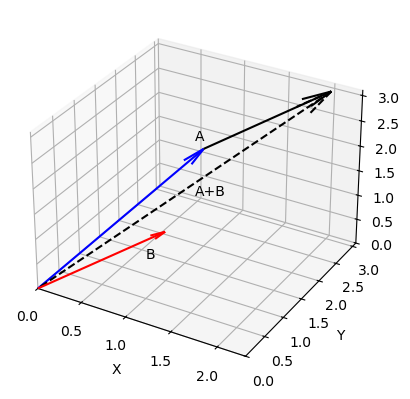

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ax, Ay, Az = 1, 2, 2
Bx, By, Bz = 1, 1, 1

ax.quiver(0, 0, 0, Ax, Ay, Az, color='blue', length=1, arrow_length_ratio=.1)
ax.quiver(0, 0, 0, Bx, By, Bz, color='red', arrow_length_ratio=.1)

ax.quiver(0, 0, 0, Ax+Bx, Ay+By, Az+Bz, color='black', linestyle='--', arrow_length_ratio=.1)
ax.quiver(Ax, Ay, Az, Bx, By, Bz, color='black', arrow_length_ratio=.2)

ax.set_xlim(0,2.3)
ax.set_ylim(0,3.1)
ax.set_zlim(0,3.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.text(.9, 2, 2.1, 'A')
ax.text(1.1, .3, 1., 'B')
ax.text(.9, 2, 1., 'A+B')

plt.show()

### Example 4.2: Displacements as vectors

In [5]:
import numpy as np

r1 = np.array([2,3])
r2 = np.array([4,2])

delta_r = r2 - r1

# find the magnitude and direction of r2-r1
magnitude = np.linalg.norm(delta_r)
direction = np.arctan(delta_r[1]/delta_r[0]) * 180 / np.pi

print('Delta r = ', delta_r)
print('The magnitude of Delta r = ', round(magnitude, 3))
print('The direction of Delta r = ', round(direction, 3), 'degrees')

Delta r =  [ 2 -1]
The magnitude of Delta r =  2.236
The direction of Delta r =  -26.565 degrees


## Scalar and vector fields in python

## 4.3 Vector mutiplication

### 4.3.1 The dot product

### Example 4.3: Work done by a force

In [6]:
from sympy.vector import CoordSys3D
from sympy import acos, pi

R = CoordSys3D('R')

F = -3*R.i + 2*R.j - 1 * R.k
r = 1*R.i + -3*R.j - 2 * R.k

F_mag = F.magnitude()
r_mag = r.magnitude()

work = F.dot(r)

cos_angle = work/(F_mag*r_mag)

print('work', work)
print('cos(phi)', cos_angle)
print('phi', (acos(cos_angle) * 180/np.pi).evalf(5), ' degrees')

work -7
cos(phi) -1/2
phi 120.00  degrees


### Example 4.4: The dot product of two vectors in SymPy

In [8]:
from sympy.vector import CoordSys3D
from sympy import symbols

Ax, Ay, Az, Bx, By, Bz = symbols('Ax, Ay, Az, Bx, By, Bz')

R = CoordSys3D('R')

A = Ax * R.i + Ay * R.j + Az * R.k
B = Bx * R.i + By * R.j + Bz * R.k

print('A dot B ', A.dot(B))
print('B dot A ', B.dot(A))
print('A dot A ', A.dot(A))
print('R.i dot R.j ', R.i.dot(R.j))
print('R.i dot R.i', R.i.dot(R.i))

A dot B  Ax*Bx + Ay*By + Az*Bz
B dot A  Ax*Bx + Ay*By + Az*Bz
A dot A  Ax**2 + Ay**2 + Az**2
R.i dot R.j  0
R.i dot R.i 1


### Example 4.5: The dot product in NumPy

In [9]:
from numpy import dot, array
from sympy import expand, symbols

Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz = symbols('Ax, Ay, Az, Bx, By, Bz, Cx, Cy, Cz')
A = array([Ax, Ay, Az])
B = array([Bx, By, Bz])
C = array([Cx, Cy, Cz])

print(dot(A,B))
print(dot(B,A))
print(dot(A,A))

print(dot(A, B+C).expand() == dot(A,B)+dot(A,C))

Ax*Bx + Ay*By + Az*Bz
Ax*Bx + Ay*By + Az*Bz
Ax**2 + Ay**2 + Az**2
True


### 4.3.2 The cross product

### Example 4.6: Torque

In [11]:
from sympy.vector import CoordSys3D

N = CoordSys3D('R')

F =-3*N.i+2*N.j-1*N.k#forcevector
r =1*N.i+-3*N.j-2*N.k#positionvector
B =-1*N.i+1*N.j-1*N.k#givendirectionvectorB

torque = r.cross(F)
print(torque, ' Nm')
B_hat = B.normalize()
print('The normal vecotr is = ', B_hat)
print('Torque component along B is ', B_hat.dot(r.cross(F)), ' N m')

7*R.i + 7*R.j + (-7)*R.k  Nm
The normal vecotr is =  (-sqrt(3)/3)*R.i + (sqrt(3)/3)*R.j + (-sqrt(3)/3)*R.k
Torque component along B is  7*sqrt(3)/3  N m


### Example 4.7: Plotting the cross product $A\times B$

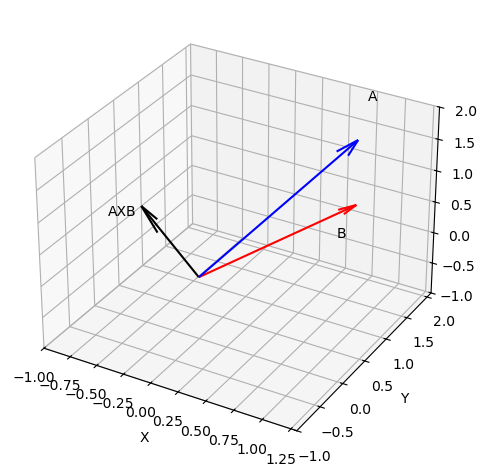

In [14]:
import  matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Ax, Ay, Az = 1, 1, 2
Bx, By, Bz = 1, 1, 1

# plot3vectorsA,B,AXBusingquiver()
ax.quiver(0,0,0,Ax,Ay,Az,color='blue',length=1,arrow_length_ratio=.1)
ax.quiver(0,0,0,Bx,By,Bz,color='red',arrow_length_ratio=.1)
ax.quiver(0,0,0,Ay*Bz-Az*By,Bx*Az-Bz*Ax,Ax*By-Ay*Bx,color='k',\
arrow_length_ratio=.3)


ax.set_xlim(-1,1.3);
ax.set_ylim(-1,2.1);
ax.set_zlim(-1,2);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.text(.7,2,1.9,'A')
ax.text(1.1,.3,1.,'B')
ax.text(-.6,-.5,1.,'AXB')
plt.tight_layout()
plt.show()

### Example 4.8: The cross product of two vectors in SymPy

In [15]:
from sympy.vector import CoordSys3D
from sympy import acos, pi, symbols

Ax, Ay, Az, Bx, By, Bz = symbols('Ax, Ay, Az, Bx, By, Bz')

R = CoordSys3D('R')

A = Ax*R.i+Ay*R.j+Az*R.k
B = Bx*R.i+By*R.j+Bz*R.k

print('Cross product A B ', A.cross(B))
print('Cross product B A ', B.cross(A))
print('Cross product A A ', A.cross(A))
print('Cross product R.i R.j ', R.i.cross(R.j))
print('Cross product R.i R.i ', R.i.cross(R.i))

Cross product A B  (Ay*Bz - Az*By)*R.i + (-Ax*Bz + Az*Bx)*R.j + (Ax*By - Ay*Bx)*R.k
Cross product B A  (-Ay*Bz + Az*By)*R.i + (Ax*Bz - Az*Bx)*R.j + (-Ax*By + Ay*Bx)*R.k
Cross product A A  0
Cross product R.i R.j  R.k
Cross product R.i R.i  0


### Example 4.9: The cross product in NumPy

In [19]:
from numpy import cross, array
from sympy import symbols, simplify

Ax, Ay,Az,Bx,By,Bz,Cx,Cy,Cz=symbols('Ax, Ay,Az,Bx,By,Bz,\
Cx, Cy,Cz')
A =array([Ax,Ay,Az])
B =array([Bx,By,Bz])
C =array([Cx,Cy,Cz])

print('Cross(A,B)', cross(A,B))
print('Cross(B,A)', cross(B,A))
print('Cross(A,A)', cross(A,A))
print('Cross(A, B+C)', simplify(cross(A, B+C)))
print('Cross(A, B) + Cross(A, C)', simplify(cross(A, B) + cross(A, C)))
print(simplify(cross(A, B) + cross(A, C) - cross(A, B+C)))

Cross(A,B) [Ay*Bz - Az*By -Ax*Bz + Az*Bx Ax*By - Ay*Bx]
Cross(B,A) [-Ay*Bz + Az*By Ax*Bz - Az*Bx -Ax*By + Ay*Bx]
Cross(A,A) [0 0 0]
Cross(A, B+C) [Ay*(Bz + Cz) - Az*(By + Cy), -Ax*(Bz + Cz) + Az*(Bx + Cx), Ax*(By + Cy) - Ay*(Bx + Cx)]
Cross(A, B) + Cross(A, C) [Ay*Bz + Ay*Cz - Az*By - Az*Cy, -Ax*Bz - Ax*Cz + Az*Bx + Az*Cx, Ax*By + Ax*Cy - Ay*Bx - Ay*Cx]
[0, 0, 0]


## 4.4 Triple products

### 4.4.1 Triple scalar product

### Example 4.10: Triple scalar product $A\cdot (B\times C)$

In [22]:
from numpy import cross, dot, array
from sympy import symbols, simplify

Ax, Ay,Az,Bx,By,Bz,Cx,Cy,Cz=symbols('Ax, Ay,Az,Bx,By,Bz,\
Cx, Cy,Cz')
A =array([Ax,Ay,Az])
B =array([Bx,By,Bz])
C =array([Cx,Cy,Cz])

print('\nThe identity A.(BXC)=B.(CXA) is:',\
simplify(dot(A, cross(B,C))).expand()==\
simplify(dot(B, cross(C,A))).expand())


The identity A.(BXC)=B.(CXA) is: True


### 4.4.2 Triple vector product

### Example 4.11: Triple product identity (The $BAC-CAB$ rule)

In [26]:
from numpy import cross, dot, array
from sympy import symbols, simplify

Ax, Ay,Az,Bx,By,Bz,Cx,Cy,Cz=symbols('Ax, Ay,Az,Bx,By,Bz,\
Cx, Cy,Cz')
A =array([Ax,Ay,Az])
B =array([Bx,By,Bz])
C =array([Cx,Cy,Cz])

print('cross ABC ', cross(A, cross(B,C)))
print('dot BAC ', dot(B, dot(A,C)))
print('dot CAB ', dot(C, dot(A,B)))
print('cross ABC - dot BAC + dot CAB', simplify(cross(A, cross(B,C)) - \
                                               dot(B, dot(A,C)) + dot(C, dot(A,B)))) 

cross ABC  [Ay*(Bx*Cy - By*Cx) - Az*(-Bx*Cz + Bz*Cx)
 -Ax*(Bx*Cy - By*Cx) + Az*(By*Cz - Bz*Cy)
 Ax*(-Bx*Cz + Bz*Cx) - Ay*(By*Cz - Bz*Cy)]
dot BAC  [Bx*(Ax*Cx + Ay*Cy + Az*Cz) By*(Ax*Cx + Ay*Cy + Az*Cz)
 Bz*(Ax*Cx + Ay*Cy + Az*Cz)]
dot CAB  [Cx*(Ax*Bx + Ay*By + Az*Bz) Cy*(Ax*Bx + Ay*By + Az*Bz)
 Cz*(Ax*Bx + Ay*By + Az*Bz)]
cross ABC - dot BAC + dot CAB [0, 0, 0]


### Example 4.12: Angular momentum

In [29]:
from sympy.vector import CoordSys3D

N = CoordSys3D('N')
r = 1 * N.i + -3 * N.j + -2 * N.k
omega = 1 * N.i + -1 * N.j + 4 * N.k

m = 5

velocity = omega.cross(r)
print(velocity)

l = m*r.cross(velocity)
print('Angular moment l is ', l, 'kg m^2/s')

14*N.i + 6*N.j + (-2)*N.k
Angular moment l is  90*N.i + (-130)*N.j + 240*N.k kg m^2/s


## 4.5 Non-cartesian coordinates
Tnese are more commonly referred to as polar, cylindrical, and spherical coordinates, respectively.

### 4.5.1 Polar coordinates

### Example 4.13: Unit vectors in polar coordinates

In [30]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
x, y, dx, dy, rho, phi, drho, dphi, i, j, rhat, phihat = \
symbols('x, y, dx, dy, rho, phi, drho, dphi, i, j, rhat, phihat', real=True)

eq1 = Eq(rhat, cos(phi)*i + sin(phi)*j)
eq2 = Eq(phihat, -sin(phi)*i + cos(phi)*j)

sol = solve((eq1, eq2), (i,j))

print('i-unit vector = ', simplify(sol[i]))
print('j-unit vector = ', simplify(sol[j]))

i-unit vector =  -phihat*sin(phi) + rhat*cos(phi)
j-unit vector =  phihat*cos(phi) + rhat*sin(phi)


### 4.5.2 Cylindrical coordinates

### Example 4.14: Infinitesimal length ds in polar coordinates

In [32]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
import pprint

x, y, z, dx, dy, dz, rho, phi, drho, dphi = \
symbols('x, y, z, dx, dy, dz, rho, phi, drho, dphi', real=True)

# Equations for (x, y, z) as functions of (r, phi, z)
x = rho * cos(phi)
y = rho * sin(phi)
z = z

# find differentials dx, dy using chain rule
dx = diff(x, rho)*drho + diff(x, phi)*dphi + diff(x,z)*dz
dy = diff(y, rho)*drho + diff(y, phi)*dphi + diff(y,z)*dz
dz = diff(z, rho)*drho + diff(z, phi)*dphi + diff(z,z)*dz

# the length element ds**2
print(simplify(dx**2+dy**2+dz**2))

dphi**2*rho**2 + drho**2 + dz**2


### 4.5.3 Spherical coordinates

### Example 4.15: Unit vectors and length element ds in spherical coordinates

In [33]:
from sympy import symbols, Eq, diff, sin, cos, simplify, solve
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

x, y, dx, dy, r, theta, phi, dr, dtheta, dphi, i, j, k, rhat, thetahat, \
phihat = symbols('x, y, dx, dy, r, theta, phi, dr, dtheta, dphi, i, j, k, rhat, thetahat, \
phihat', real=True)

# spherical unit vectors as functions of i, j, k vectors
eq1 =Eq(rhat,sin(theta)*cos(phi)*i+sin(theta)*sin(phi)*j+cos(theta)*k)
eq2 =Eq(thetahat,cos(theta)*cos(phi)*i+cos(theta)*sin(phi)*j-\
sin(theta)*k)
eq3 =Eq(phihat,-sin(phi)*i+cos(phi)*j)

sol = solve((eq1, eq2, eq3), (i, j, k))
print(simplify(sol[i]))
print(simplify(sol[j]))
print(simplify(sol[k]))

-phihat*sin(phi) + rhat*sin(theta)*cos(phi) + thetahat*cos(phi)*cos(theta)
phihat*cos(phi) + rhat*sin(phi)*sin(theta) + thetahat*sin(phi)*cos(theta)
rhat*cos(theta) - thetahat*sin(theta)


In [35]:
# Equations for (x, y, z) as functions of (r, phi, z)
x = rho * sin(theta) * cos(phi)
y = rho * sin(theta) * sin(phi)
z = rho * cos(theta)

# find differentials dx, dy using chain rule
dx = diff(x, rho)*drho + diff(x, phi)*dphi + diff(x,theta)*dtheta
dy = diff(y, rho)*drho + diff(y, phi)*dphi + diff(y,theta)*dtheta
dz = diff(z, rho)*drho + diff(z, phi)*dphi + diff(z,theta)*dtheta

# the length element ds**2
print(simplify(dx**2+dy**2+dz**2))

dphi**2*rho**2*sin(theta)**2 + drho**2 + dtheta**2*rho**2


## 4.6 Differentiation of vectors

### Example 4.16: Time derivatives of vectors

In [36]:
from sympy import symbols, diff, simplify
from sympy.vector import CoordSys3D

R = CoordSys3D('R')

c1, c2, c3, t = symbols('c1, c2, c3, t', positive=True)

r =(3*c1*t**2)*R.i-(2*c2*t**3)*R.j+(4*c3*t)*R.k
v =diff(r,t)
a =diff(r,t,t)

print(v)
print(a)

6*c1*t*R.i + (-6*c2*t**2)*R.j + 4*c3*R.k
6*c1*R.i + (-12*c2*t)*R.j


In [37]:
print(simplify(v.normalize().subs(t,0)))

R.k


## 4.7 Parametric equations of lines and planes

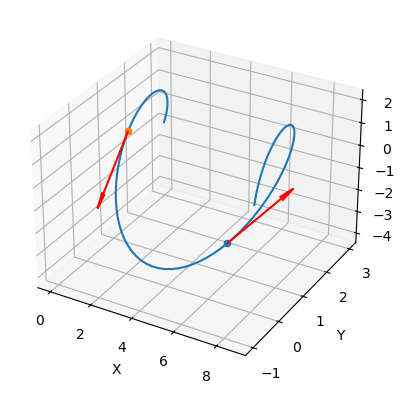

In [47]:
import matplotlib.pyplot as plt
import numpy as np
t =np.arange(0,8.8,0.1)#timevaluesfromt=0tot=9s
def pos(t):
    x = t
    y =1+2*np.cos(t) # definex(t),y(t),z(t)
    z =-1+3*np.sin(t)
    return np.array([x,y,z])
def vel(t):
    vx =1 # definex(t),y(t),z(t)
    vy =-2*np.sin(t)
    vz =3*np.cos(t)
    return np.array([vx,vy,vz])
xpos, ypos,zpos=pos(t) # evaluatethepositionarray
to=5 # dotaddedtographatto=5s
xo,yo,zo =pos(to) # unpackthepositionarrayatto=5s
velx, vely,velz=vel(to)#unpackthevelocityarrayatto=5s
# setup3Dplotandplotcurvex(t),y(t),z(t)

fig =plt.figure()
ax =fig.add_subplot(projection='3d')
ax.plot3D(xpos,ypos,zpos)
ax.quiver(xo,yo,zo, velx,vely,velz,color='red',length=1,\
arrow_length_ratio=.2)
ax.scatter(xo,yo,zo)

to=2 # dotaddedtographatto=2s
xo,yo,zo =pos(to) # unpackthepositionarrayatt=2s
velx, vely,velz=vel(to)#unpackthevelocityarrayatt=2s
ax.quiver(xo,yo,zo, velx,vely,velz,color='red',length=1,\
arrow_length_ratio=.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(xo,yo,zo)
ticks=np.arange(-1,4,1) #definethetickmarksonz-axis
ax.set_yticks(ticks)

plt.show()

### Example 4.18: Plotting a plane surface and a vector perpendicular to it

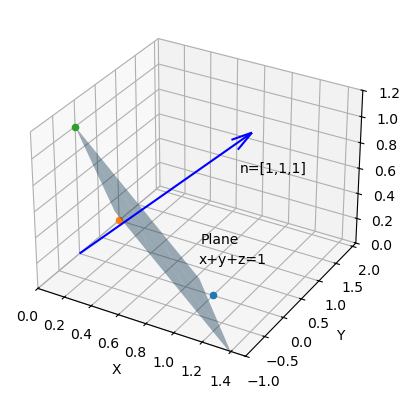

In [51]:
import matplotlib.pyplot as plt
import numpy as np
fig =plt.figure()
ax =fig.add_subplot(projection='3d') #setup3Dplot
Ax, Ay,Az=1,1,1 # componentsofvectorA
# setupX,Y,Zforsurfaceplot
# usequiver()toplotthearrow,setlimits,addtext
# plottheplanez=1-x-y
x =np.arange(0,1,0.3)
y =np.arange(0,1,0.3)
X, Y=np.meshgrid(x,y)
Z =1-X-Y
ax.plot_surface(X, Y,Z,alpha=0.4)
# plotarrowforvectorA
ax.quiver(0,0,0,Ax,Ay,Az,color='blue',length=1,arrow_length_ratio=.1)
ax.scatter(1, 0, 0)
ax.scatter(0, 1, 0)
ax.scatter(0, 0, 1)
ax.set_xlim(0,1.5);
ax.set_ylim(-1,2.1);
ax.set_zlim(0,1.2);
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.text(1.1,.3,.9,'n=[1,1,1]') #addtextto3Dplot
ax.text(.7,.75,.1,'Plane')
ax.text(.7,.7,-.05,'x+y+z=1')
plt.show()

### Example 4.19: Geodesic on a sphere

A geodesic is the shortest possible path between two points that a particle can take on a curved surface

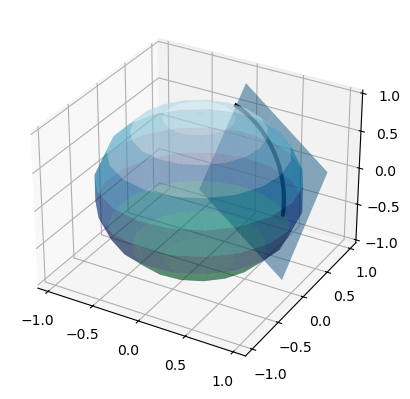

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# create the 3D plance z=y-x
x = np.arange(0,1,0.3)
y = np.arange(0,1,0.3)
xp, yp = np.meshgrid(x, y)
zp = yp - xp
ax.plot_surface(xp, yp, zp, alpha=0.5)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]

xs = np.cos(u)*np.sin(v)
ys = np.sin(u)*np.sin(v)
zs = np.cos(v)

ax.plot_surface(xs, ys, zs, cmap=cm.ocean, alpha=0.4)


xg = np.linspace(0,0.7,100)
yg =(xg+np.sqrt(xg**2-8*(2*xg**2-1)))/4
zg=yg-xg
ax.plot3D(xg,yg,zg, 'black', lw=3)

ticks =np.arange(-1,1.5,0.5) # graphformatting
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
plt.show()